## **Matplotlib** 
---

[*Matplotlib*](https://matplotlib.org/contents.html) - одна из крупнейших библиотек в Python для создания статических, интерактивных и анимационных визуализаций. 

Мы рассмотрим несколько основных возможностей этой библиотеки. Для того, чтобы начать работу с данной библиотекой, ее необходимо импортировать. Общепринято импортировать эту библиотеку под именем `plt`. Имортируем также библиотеку `numpy`, так как мы будем работать с массивами и математическими функциями.

In [2]:
import matplotlib.pyplot as plt
import numpy as np 

#### График функции

Создадим массив `x` и массив значений функции `y(x)` по формуле 
$y(x) = sin^2(2x) e^{\left(\frac{x + 2}{10}\right)^2}$

In [5]:
x = np.linspace(-10, 10, 1000)
y = np.sin(2 * x) ** 2 * np.exp((x + 2) / 10)**2

Построим график `y(x)` при помощи функции `plot`. Параметры графика в данном случае выставляются по умолчанию.

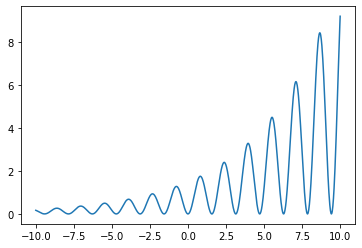

In [4]:
plt.plot(x, y);

При желании можно сделать разрешение рисунка более четким, изменив формат рисунков на `svg` или `retina` через функцию `set_matplotlib_formats`



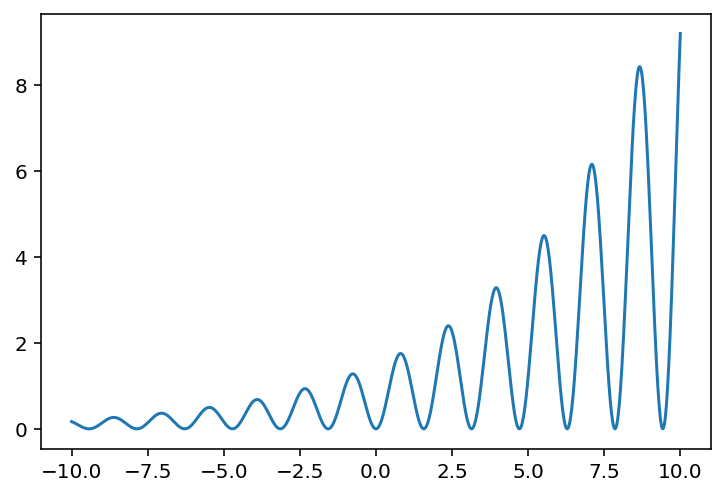

In [6]:
from matplotlib_inline.backend_inline import set_matplotlib_formats
set_matplotlib_formats('retina')
plt.plot(x, y);

Для использования рисунков в различных внешних программах (Word, LaTex и т.п.) очень часто возникает необходимость задать конкретный размер рисунка. Это можно сделать при помощи задания аргумента `figsize` функции `figure`: 

Размер фигуры можно изменять для этого необходимо создать его явно с помощью функции `figure` и передать в нее именованный аргумент `figsize` с размером фигуры.

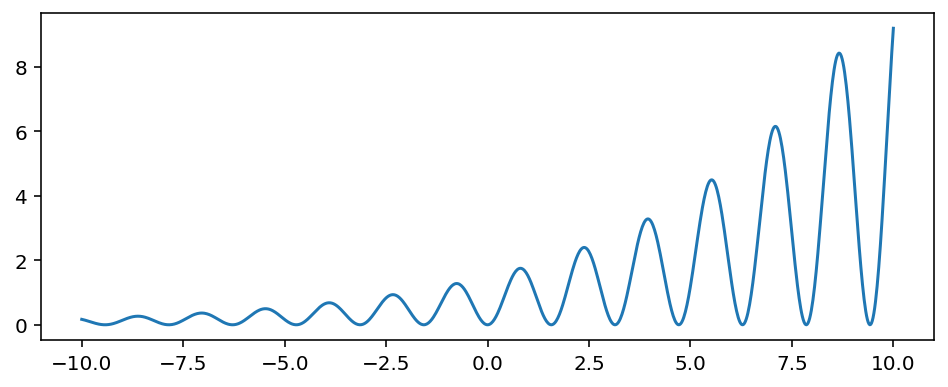

In [7]:
plt.figure(figsize=(8, 3))
plt.plot(x, y);

На график можно добавить сетку при помощи функции `grid`. Стиль линии сетки задается аргументом `linestyle`, а ее толщина - аргументом `lw`.

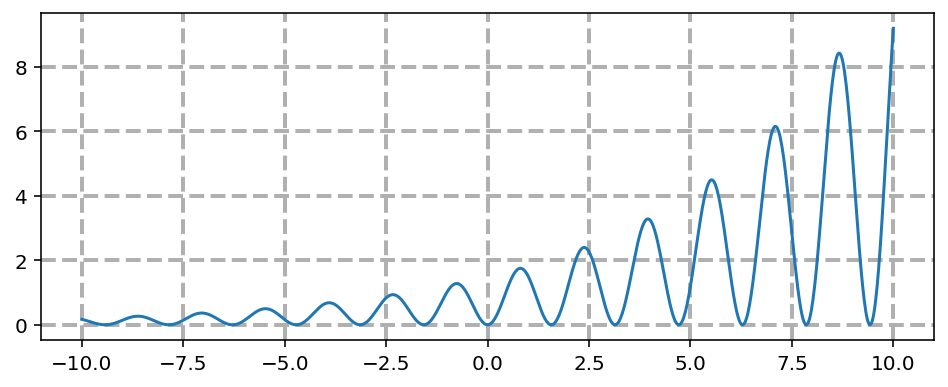

In [8]:
plt.figure(figsize=(8, 3))
plt.grid(lw=2, ls='--')
plt.plot(x, y);

Толщина линии самого графика тоже задается аргументом `lw`, а ее цвет - аргументом `color`. Значение аргумента `color` может быть задано разными способами: можно выбрать один из встроенных цветов, которым присвоены специальные имена (например, `red` для красного цвета), либо в координатах RGBA от 0 до 1 (R - интенсивность красной компоненты, G - зеленой, B - синей, A задает прозрачность), либо одним числом в шестнадцатеричном формате

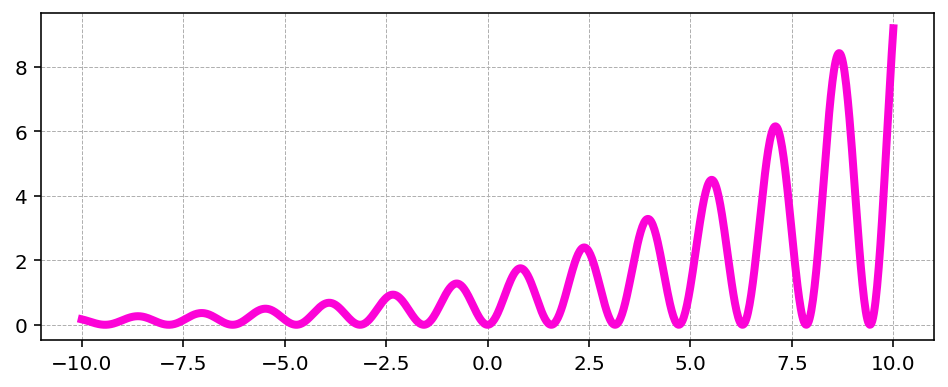

In [9]:
plt.figure(figsize=(8, 3))
plt.grid(lw=0.5, linestyle='--')
plt.plot(x, y, lw=4.0, # Толщина линии
#           color='red'  # Выбор одного из "вшитых" цветов, которые можно подзывать по имени
#         color=(0.1, 0.9, 0.5, 0.95)  # Задание цвета в формате rgba   
        color='#fc03d7'  # Задание цвета в формате hex

        )


Графические объекты можно располагать на различных слоях, что позволяет создавать разные интересные эффекты. Например, можно нарисовать нашу линию с окантовкой другого цвета. Для этого нужно нарисовать тот же график другим цветом и линией бОльшей толщины и поместить этот график на нижний уровень, задав значение аргумента `zorder = 0`:

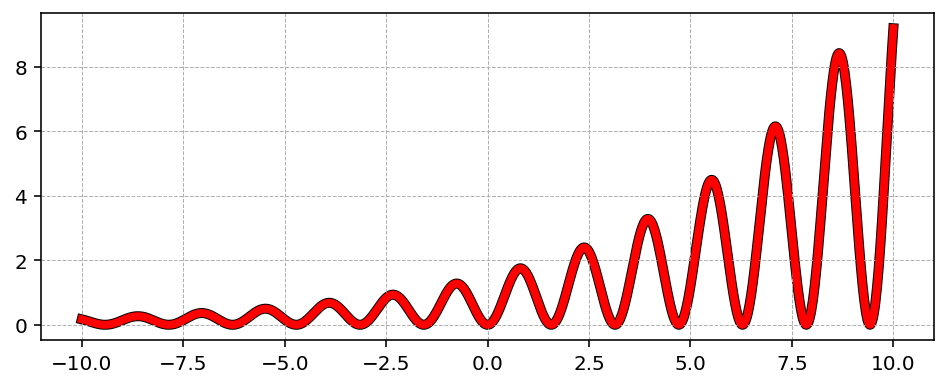

In [10]:
plt.figure(figsize=(8, 3))
plt.grid(lw=0.5, linestyle='--')
plt.plot(x, y, lw=4.0, color='red')
plt.plot(x, y, lw=5.0, color='black', zorder=0)

Типов линий и параметров настройки графиков в *matplotlib* очень много, и чтобы не лезть в документацию при поиске каждого нужного вам параметра, можно использовать следующий трюк. 

Например, если вы хотите изменить тип линии, то можно вписать для значения аргумента `linestyle` какой-нибудь ошибочный параметр, и в ошибке вам напишут доступные варианты.

In [ ]:
plt.figure(figsize=(10, 6))
plt.grid(lw=0.5, linestyle='help me')
plt.plot(x, y)

В описании `ValueError` есть описание всех возможных типов линий. Но так получается делать не всегда)

### Диаграммы разброса (Scatter plot)

Построим функцию зашумленного синуса, используя функцию `scatter`, чтобы продемострировать работу с диаграммами разброса.

In [12]:
n = 250
x = np.linspace(-3 * np.pi, 3 * np.pi, n)
y = np.sin(x) + 0.05 * np.random.normal(loc=1.0, scale=4.0, size=x.size)

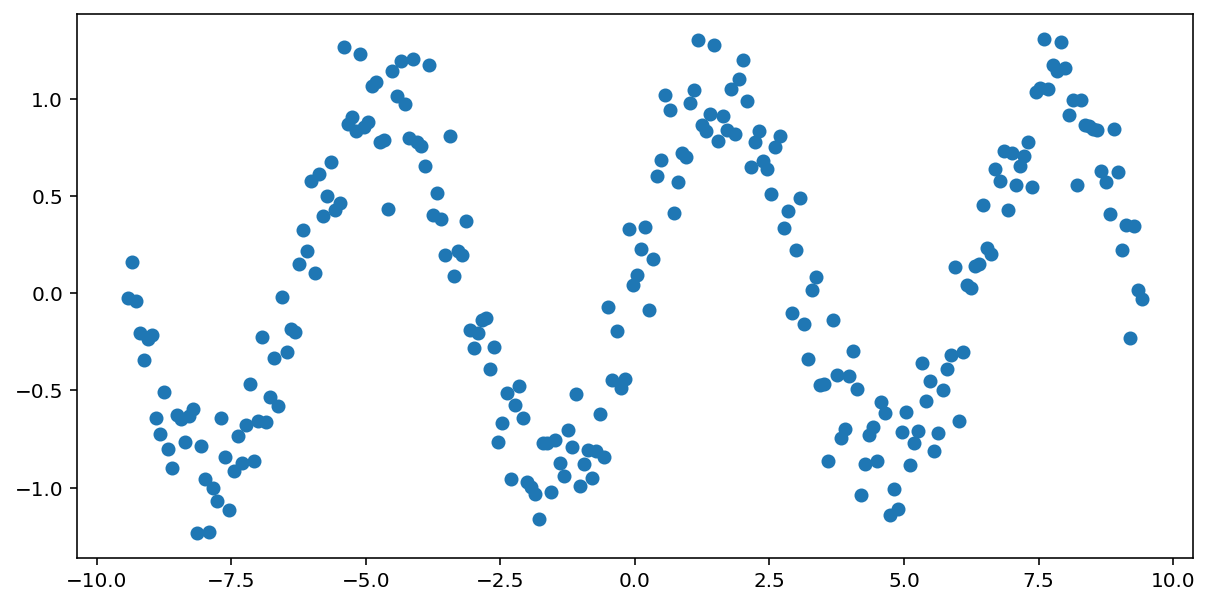

In [14]:
plt.figure(figsize=(10, 5))
plt.scatter(x, y);

Добавим на график заголовок при помощи функции `title` и подпишем оси при помощи функций `xlabel` и `ylabel`. размер шрифта задается при помощи `fontsize`. Функция `tick_params` задает формат отображения делений на графике. Зададим размер шрифта значений возле делений равным 16:

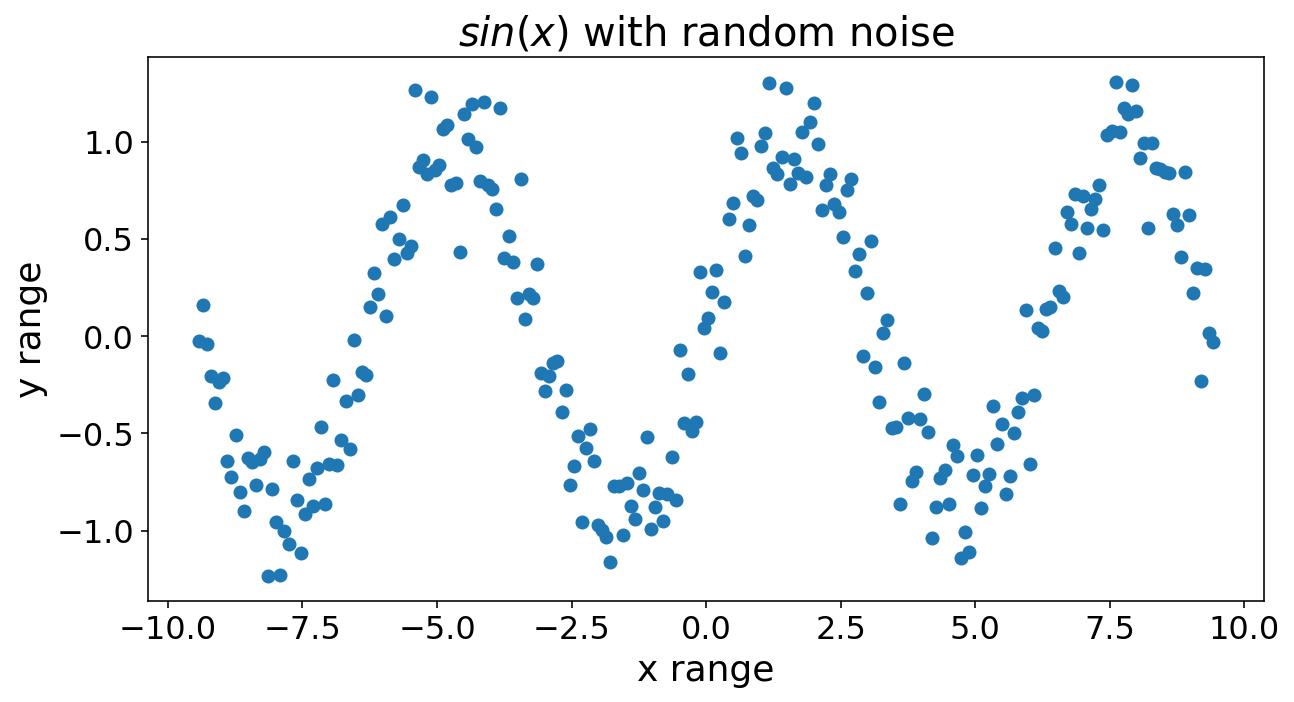

In [15]:
plt.figure(figsize=(10, 5))
plt.scatter(x, y)
plt.title(label='$sin(x)$ with random noise',  # Заголовок
          fontsize=20                          # Размер шрифта
         )
# Подпишем оси
plt.xlabel('x range', fontsize=18)
plt.ylabel('y range', fontsize=18)
plt.tick_params(labelsize=16)

Вид символов на диаграмме рассеяния можно настраивать: изменять их размер, цвет, цвет контура, орнамент

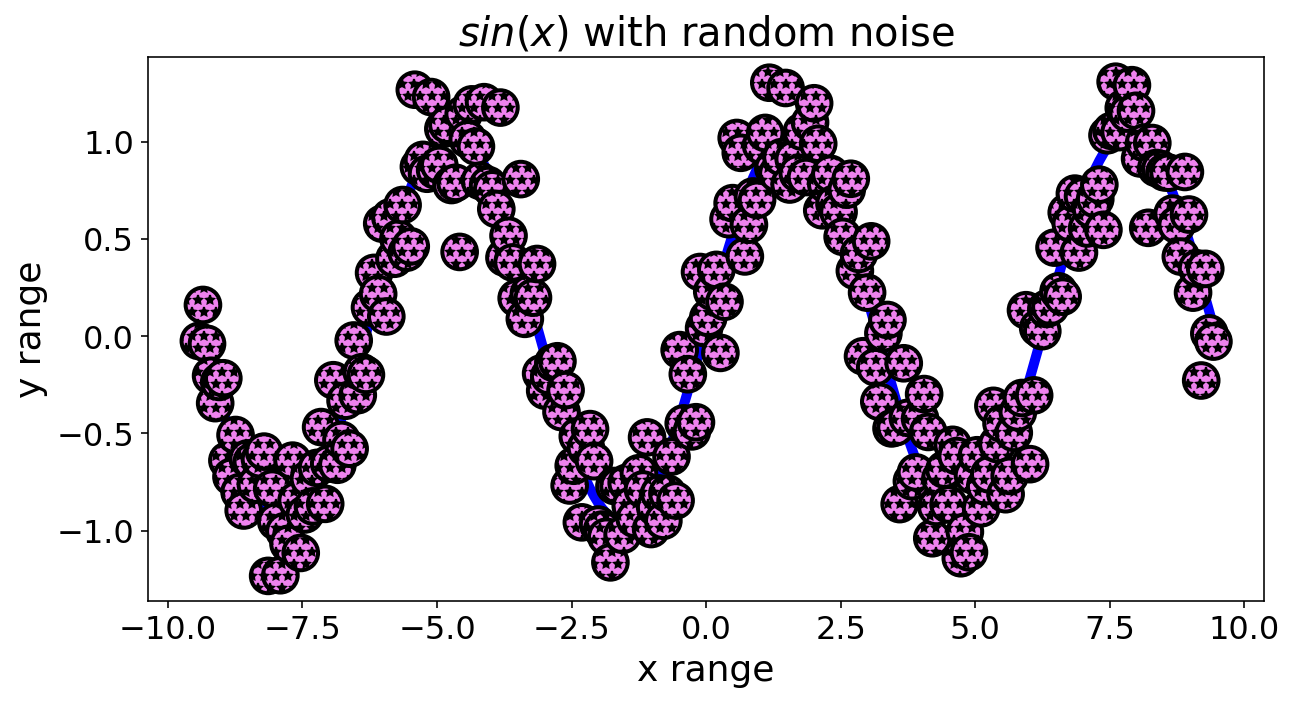

In [16]:
plt.figure(figsize=(10, 5))
plt.scatter(x, y, s=300,  # аргумент s задает площадь символа
            c='violet',   # аргумент c задает площадь символа
            marker='o',   # аргумент marker задает форму символа, 'o' озгачает круг
            edgecolors='black',  # аргумент edgecolors задает цвет границы символа
            lw=2,     # аргумент lw задает значение толщины границы символа
            hatch='**' # аргумент hatch задает орнамент символа, некоторые возможные варианты:
#                       # patterns = ('-', '+', 'x', '\\', '*', 'o', 'O', '.', '/')
           )
plt.title(label='$sin(x)$ with random noise',
          fontsize=20
         )
plt.xlabel('x range', fontsize=18)
plt.ylabel('y range', fontsize=18)
plt.tick_params(labelsize=16)
plt.plot(x, np.sin(x) + 0.05, color='blue', lw=5, zorder=0);

Вместо значений на осях, которые выставляются автоматически, можно задать свои значения. Подписи у делений на осях тоже можно  менять произвольным образом:

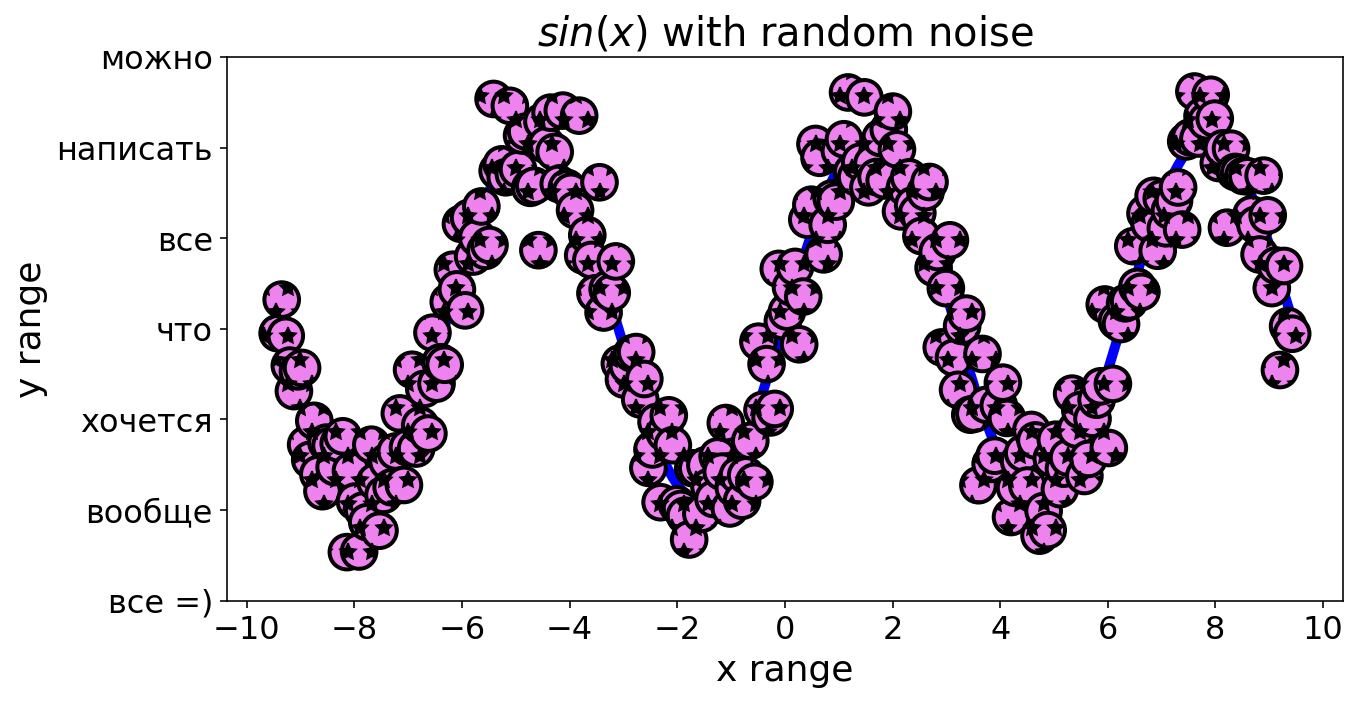

In [17]:
plt.figure(figsize=(10, 5))
plt.scatter(x, y, s=300,  # аргумент s задает площадь символа
            c='violet',   # аргумент c задает площадь символа
            marker='o',   # аргумент marker задает форму символа, 'o' озгачает круг
            edgecolors='black',  # аргумент edgecolors задает цвет границы символа
            lw=2,     # аргумент lw задает значение толщины границы символа
            hatch='*' # аргумент hatch задает орнамент символа, некоторые возможные варианты:
                      # patterns = ('-', '+', 'x', '\\', '*', 'o', 'O', '.', '/')
           )
plt.title(label='$sin(x)$ with random noise',
          fontsize=20
         )
plt.xlabel('x range', fontsize=18)
plt.ylabel('y range', fontsize=18)
plt.tick_params(labelsize=16)
plt.plot(x, np.sin(x) + 0.05, color='blue', lw=5, zorder=0);

# При желании можно вставить свои шкалы для осей
_ = plt.xticks(ticks=np.arange(-10, 11, 2)  # Нужные значения по оси x
          )
_ = plt.yticks(ticks=np.arange(-1.5, 2, 0.5),  # Значения по оси y будут заменены на подписи будут на этих позициях
           labels=['можно', 'написать', 'все', 'что', 'хочется', 'вообще', 'все =)'][::-1]
          )


Редактирование размеров и типов шрифтов на графиках часто отнимает много времени, поэтому бывает полезно переопределить неоходимые параметры графика по умолчанию. Это делается заданием атрибутов у функции `rcParams.update`. После этого все параметры построения графиков по умолчанию будут заменены на введенные нами.

In [18]:
large = 20; med = 16; small = 12
params = {'axes.titlesize': large,
          'legend.fontsize': small,
          'figure.figsize': (6, 4),
          'axes.labelsize': med,
          'axes.titlesize': med,
          'xtick.labelsize': med,
          'ytick.labelsize': med,
          'figure.titlesize': large}
plt.rcParams.update(params)

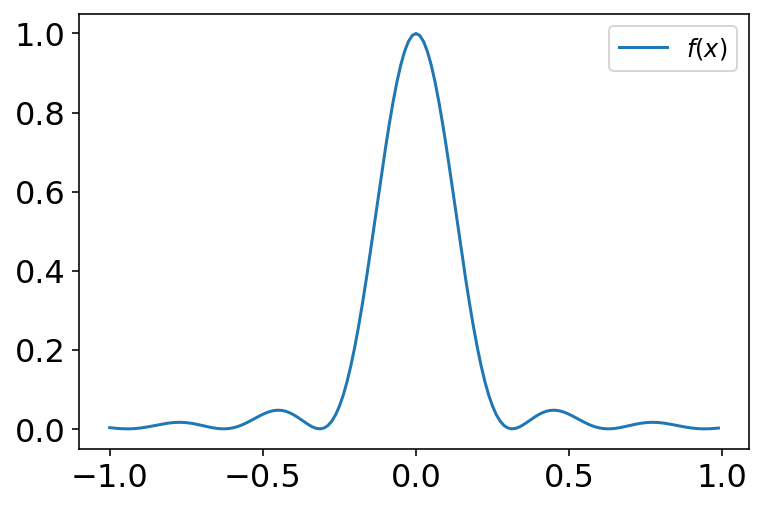

In [19]:
x = np.arange(-1, 1, 0.0125)
y = np.sin(10 * x)**2 / (10 * x)**2
plt.plot(x, y, label=r'$f(x)$')
plt.legend();

Вернуть все на место можно так

In [21]:
plt.rcParams.update(plt.rcParamsDefault)

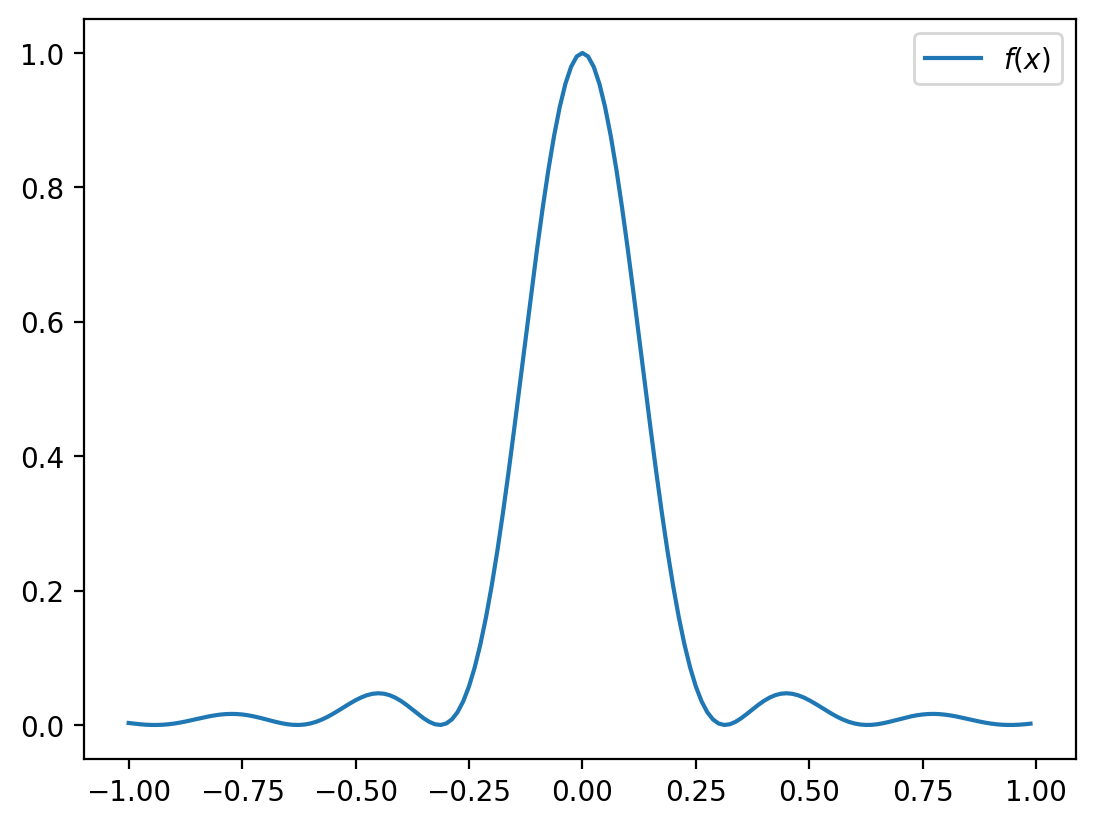

In [22]:
x = np.arange(-1, 1, 0.0125)
y = np.sin(10 * x)**2 / (10 * x)**2
plt.plot(x, y, label=r'$f(x)$')
plt.legend();

### Гистограммы (Histogram)

Библиотека `matplotlib` дает возможность строить гистограммы различного вида. Для примера порстроим гистограмму [распределения Коши](https://en.wikipedia.org/wiki/Cauchy_distribution), сгенерировав данные специальной функцией из модуля `random` библиотеки `numpy`.

In [23]:
y = np.random.standard_cauchy(size=10**7)

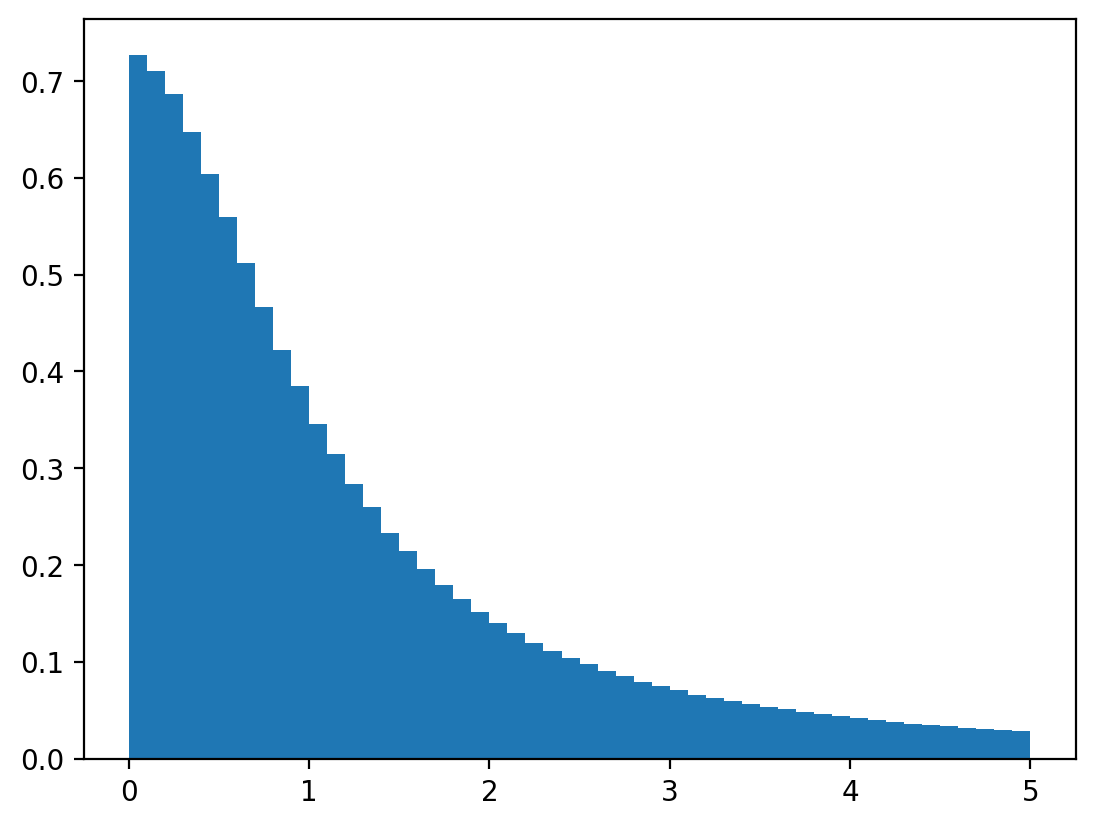

In [24]:
plt.hist(y,
    range=(0, 5),
    bins=50,
    density=True
);

Давайте рассмотрим пример посложнее, раскрасив каждый из столбцов гистограммы в зависимости от его величины. Сгенерируем данные, смешав между собой три нормальных распределения с разными параметрами:

In [25]:
n = 10 ** 7
x = np.linspace(-5 * np.pi, 5 * np.pi, n)
y1 = np.random.normal(loc=-10.0, scale=7.0, size=x.size)
y2 = np.random.normal(loc=10.0, scale=5.0, size=x.size)
y3 = np.random.normal(loc=25.0, scale=10.0, size=int(1.5*x.size))
y = np.concatenate([y1, y2, y3])

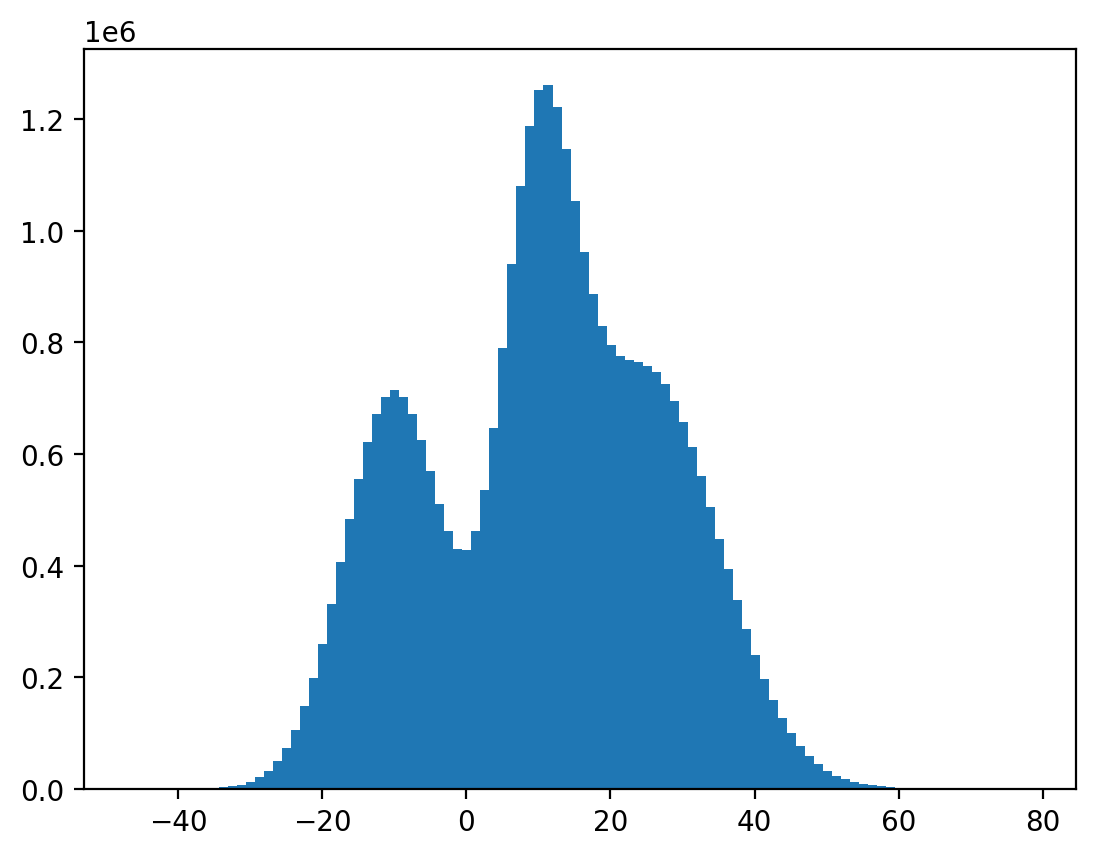

In [26]:
plt.hist(y, bins=100);

### Круговые графики

Библиотека `matplotlib` содержит инструменты для создания графиков в полярных координатах. Для того чтобы построить такой график, необходимо указать его тип при создании осей координат `projection='polar'` (в данном случае в функции `axes`).

In [27]:
N = 150
r = 2 * np.random.rand(N)
theta = 2 * np.pi * np.random.rand(N)

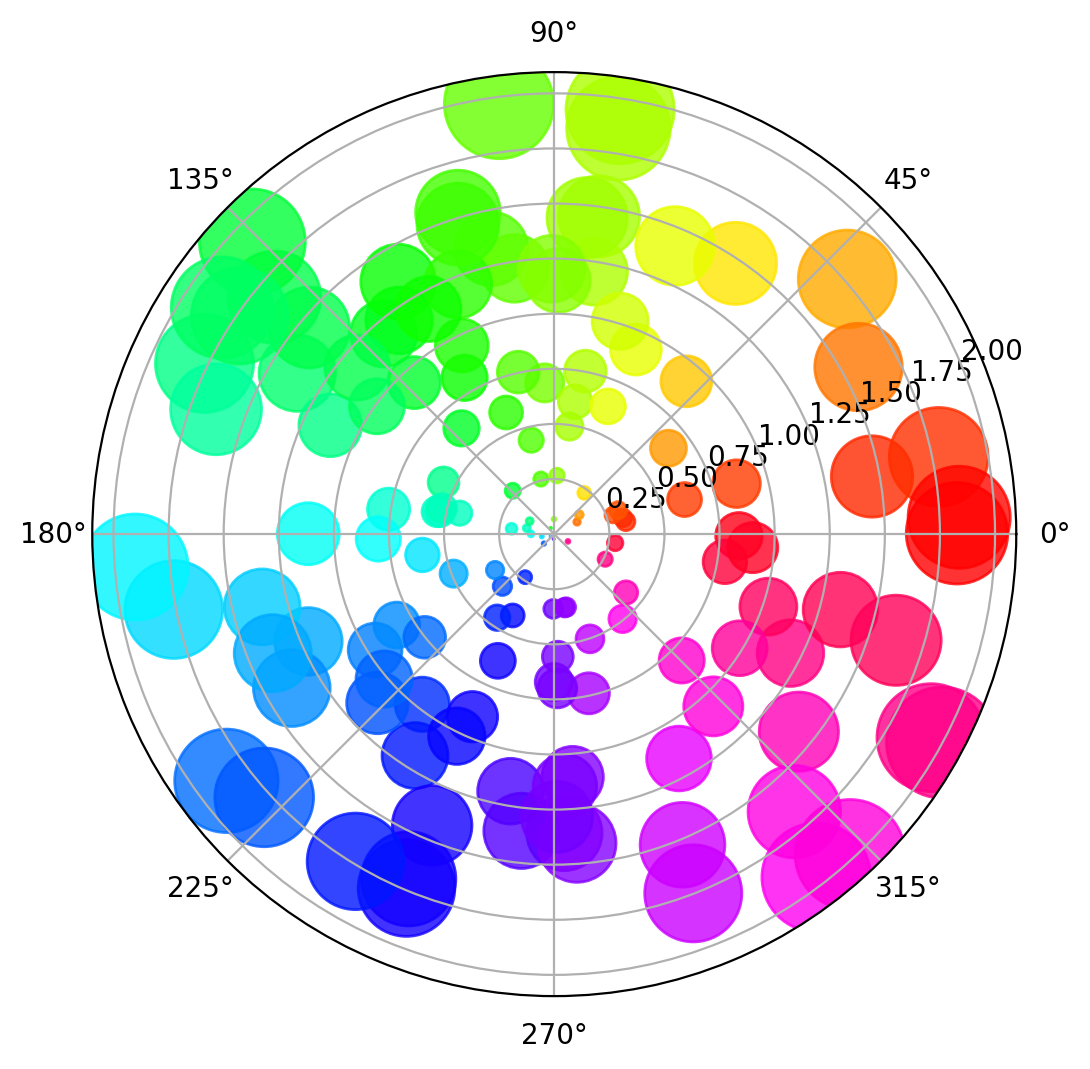

In [28]:
plt.figure(figsize=(6, 6))
plt.axes(projection='polar')
plt.scatter(theta, r,
    s=400*r**2,
    c=theta,
    cmap='hsv',  
    alpha=0.8
)

Используя функцию `pie` можно создавать круговую гистограмму. Данная функция обязательным аргументом ожидает список из долей, далее можно задать их цвета, названия и угол поворота графика.

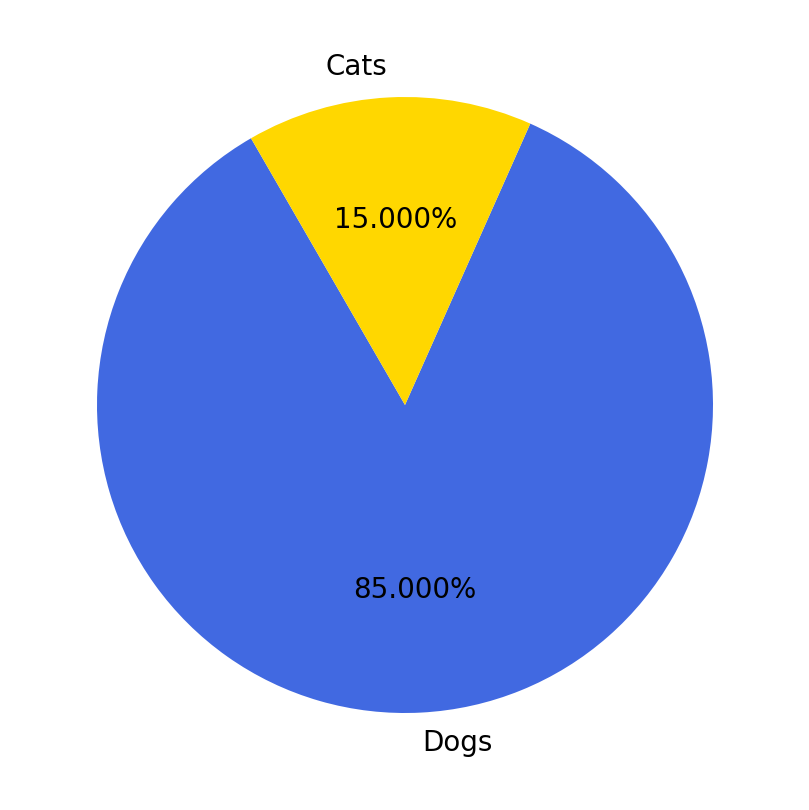

In [29]:
counts = [17, 3]
plt.figure(figsize=(5, 5)) 
plt.pie(counts,
        colors=['royalblue', 'gold'], # цвета долей
        labels=['Dogs', 'Cats'],      # подписи
        startangle=120,                # начальный угол
        autopct='%.3f%%'              # формат вывода значений долей
);           

#### Все цветовые карты, доступные по умолчанию, можно посмотреть [**тут**](https://matplotlib.org/tutorials/colors/colormaps.html)

### Графики с погрешностями

Теперь посмотрим как с помощью библиотеки `matplotlib` строить графики с погрешностями, чтобы бывает полезным при обработке данных какого-либо эксперимента

В построении графиков часто нужно показывать еще и погрешности. В `matplotlib.pyplot` за это отвечает функция `errorbar`. Построим график некоторой функции

In [30]:
x = np.linspace(-5, 5, 40)
y = np.sin(x) + np.tanh(2 * (x - 2))

и в качестве примера сгенерируем погрешности значений `y` при помощи случайного распределения

In [31]:
yerr = (2 * np.random.sample(size=y.size) - 1)  

Чтобы нарисовать график с погрешностями, используем указанную выше функцию `errorbar`, в которую в качестве первых двух агрументов передаются значения по осям Ox и Oy, а сами погрешности записываются в аргументы `yerr` или `xerr` (для погрешностей по оси Ox)

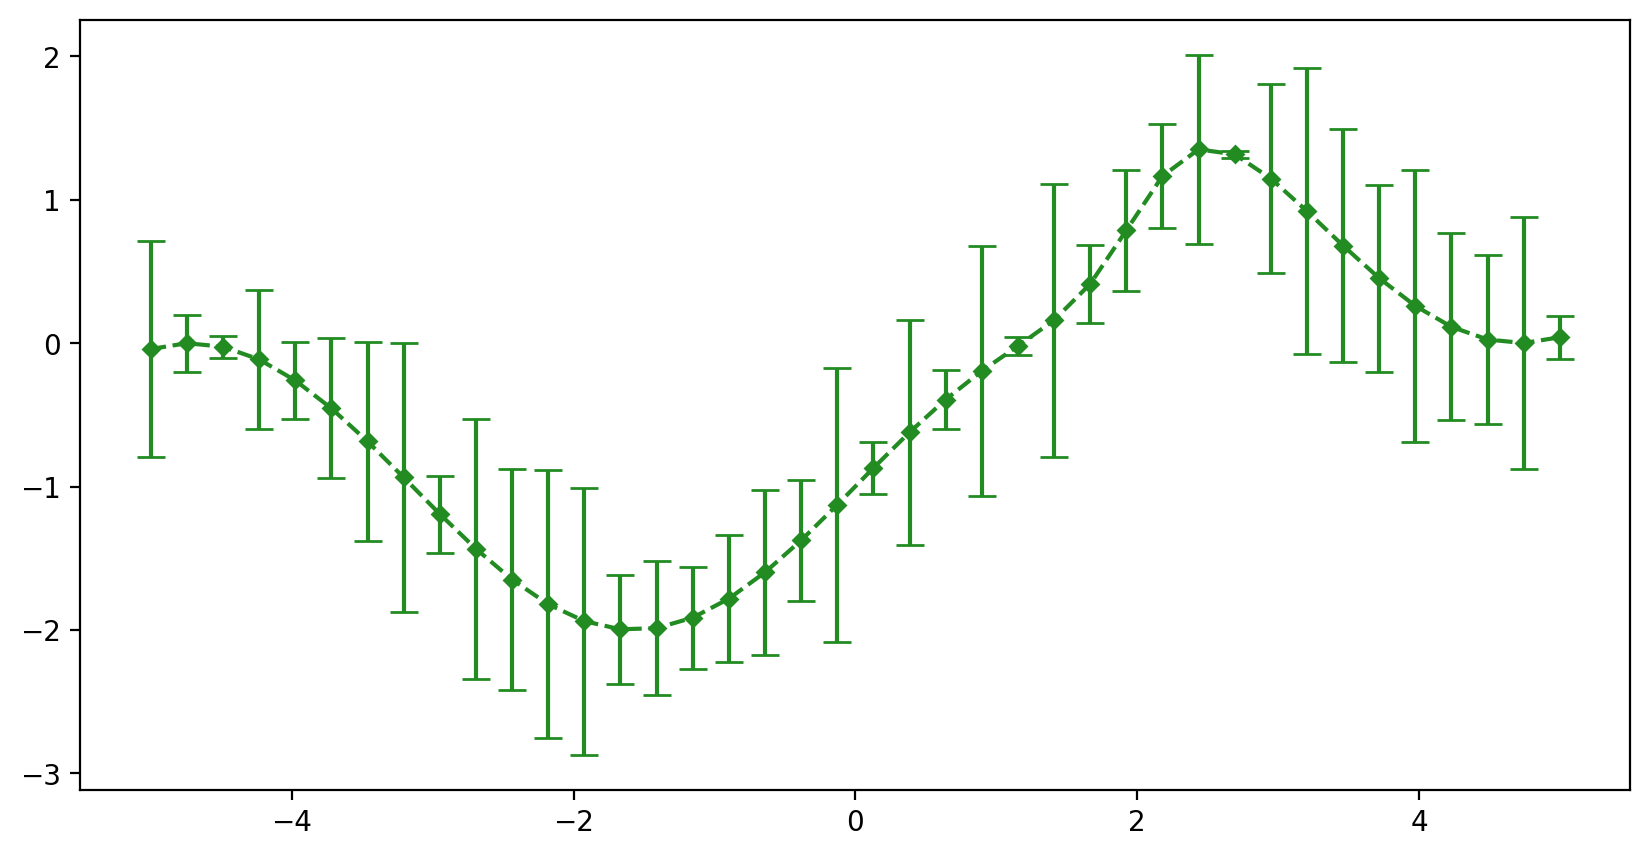

In [34]:
plt.figure(figsize=(10, 5))
plt.errorbar(x, y, ms=4, marker='D', ls='--', color='forestgreen',
             yerr=yerr,    # Массив погрешностей по Оу
             ecolor='forestgreen', # Цвет погрешностей
             capsize=5,     # Ширина планки 
             elinewidth=1.5  # Толщина линий погрешностей             
);

### Подграфики

Существует возможность разместить на одной фигуре несколько отдельных графиков. Для этого нужно использовать функцию `plt.subplots`, которая вернет кортеж из фигуры и подобластей для рисования.

Давайте написуем график, разбив его на четыре области.

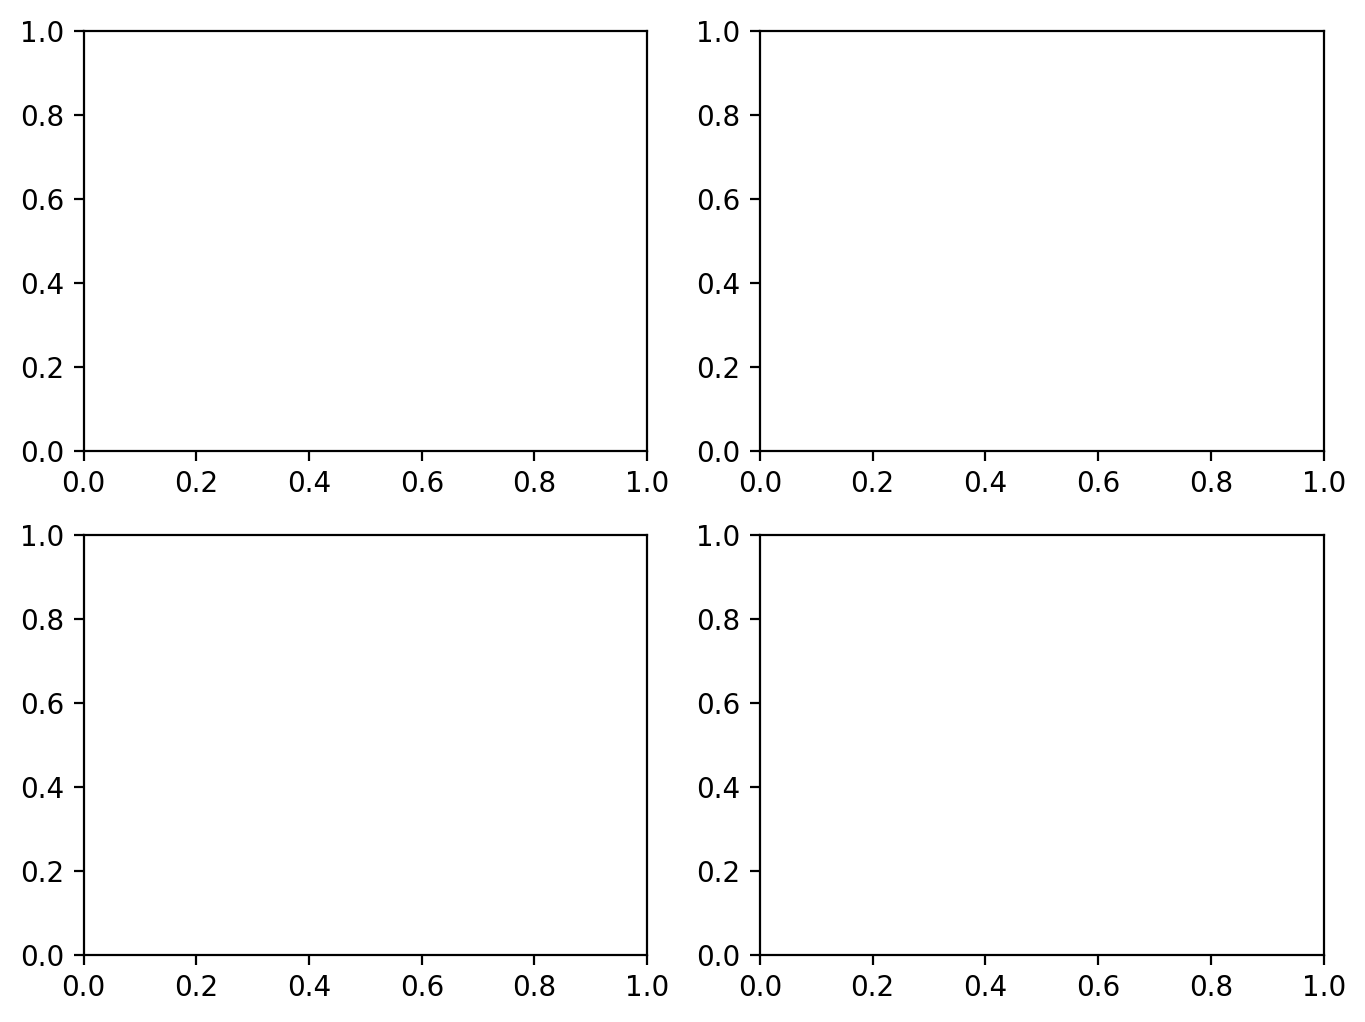

In [35]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(8, 6))

В переменной `ax` будет находиться `numpy.array` из требуемых областей для рисования, размерность массива будет соответствовать запрашиваемой размерности подграфиков. 

In [36]:
ax

array([[<AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>]], dtype=object)

Заполним наши области данными

In [37]:
x = np.linspace(-2*np.pi, 2*np.pi, 100)

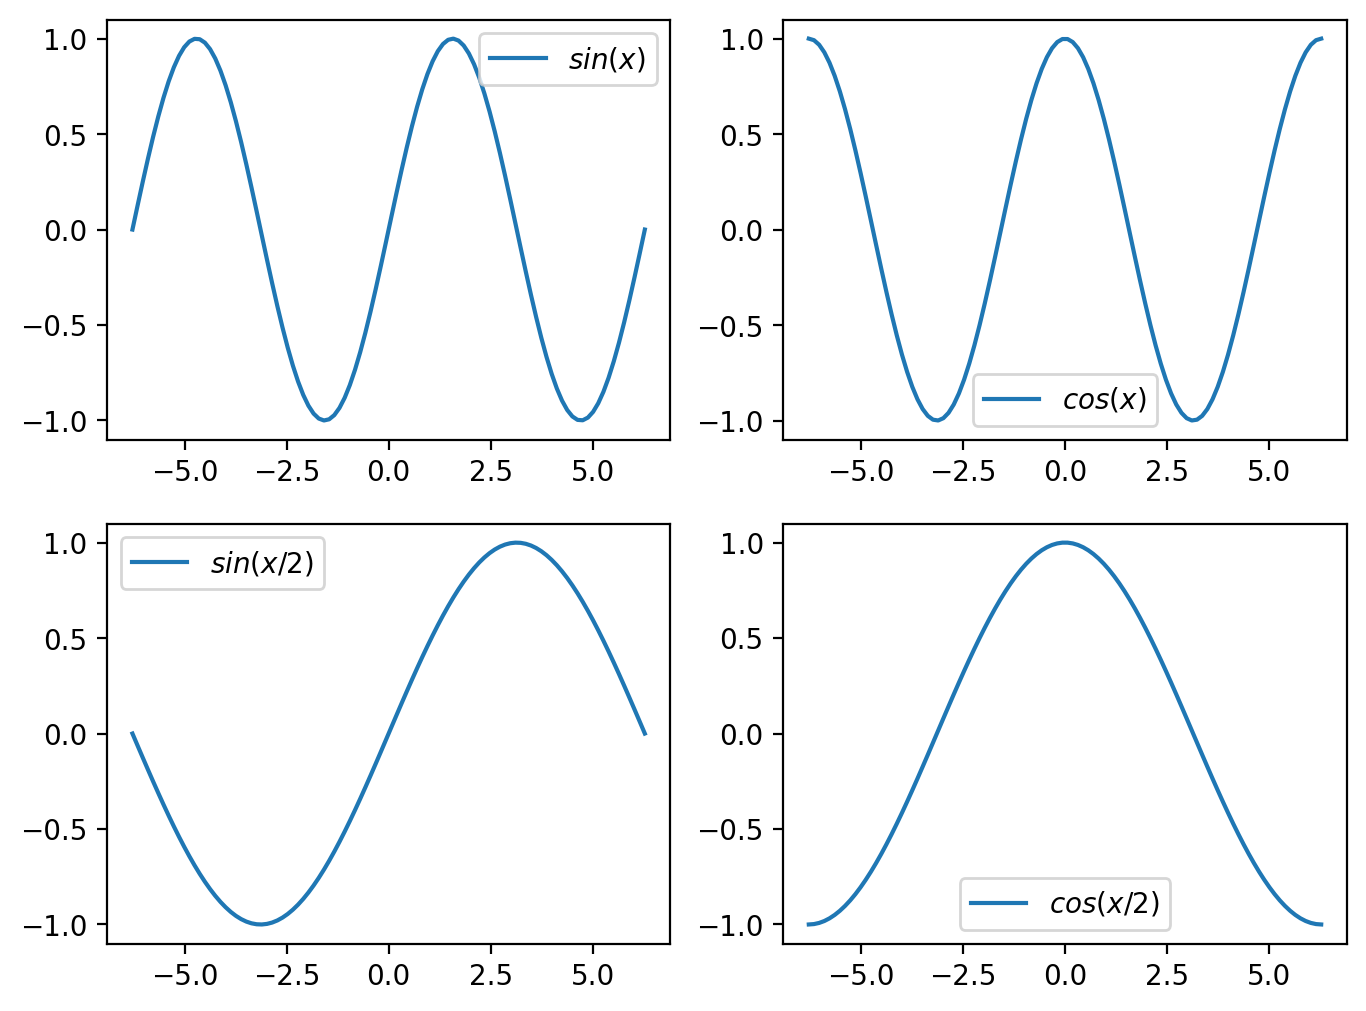

In [38]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(8, 6))
ax[0, 0].plot(x, np.sin(x), label='$sin(x)$')
ax[1, 0].plot(x, np.sin(0.5 * x), label='$sin(x/2)$')
ax[0, 1].plot(x, np.cos(x), label='$cos(x)$')
ax[1, 1].plot(x, np.cos(0.5 * x), label='$cos(x/2)$')

for i in ax.flatten():
    i.legend()

### Заливка

С помощью функции `fill_between` можно делать заливку под графиком или между двумя кривыми. В последнем случае в аргументы функции нужно передать массивы, между которыми мы хотим сделать заливку.

Если одна из кривых это константа, то ее можно задать числом.

In [39]:
x = np.linspace(-10, 10, 1000)
f1 = np.tanh(0.25 * x)
f2 = -np.tanh(x - 2)

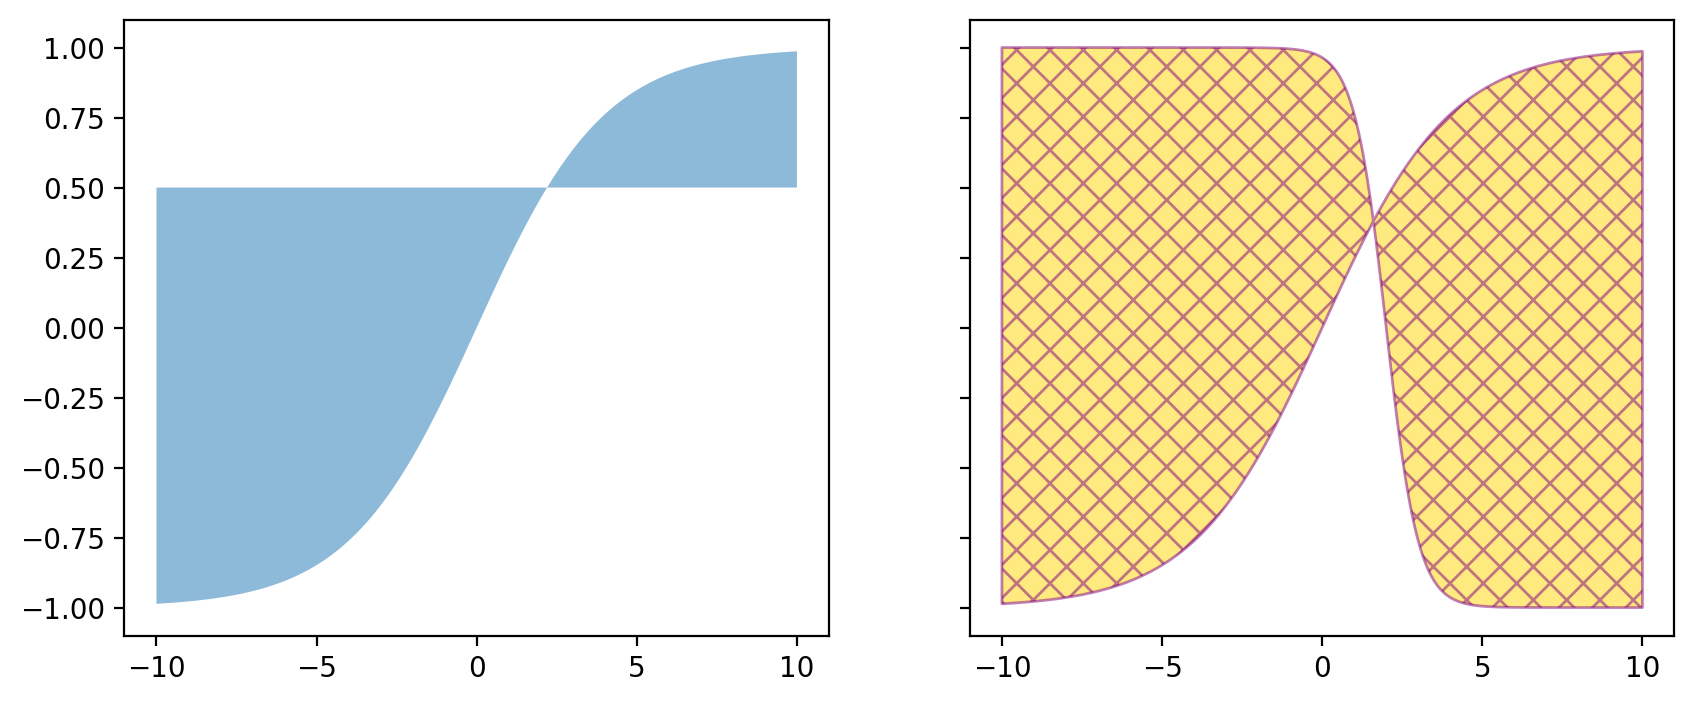

In [41]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4), sharey=True)
ax[0].fill_between(x, f1, 0.5, alpha=0.5) 
ax[1].fill_between(x, f1, f2, alpha=0.5, color='gold', ec='purple', hatch='xx');

Здесь при создании фигуры мы использовали дополнительный аргумент `sharey`, который делает общую ось `Oy` для всех графиков в одном ряду. 

### Плотностные графики

Помимо обычных двумерных графиков библиотека `matplotlib` позволяет отображать проекцию распределения многомерной функции на плоскость

Предположим, что мы хотим визуализировать функцию $f(x, y) = (x - 1)^2 - (y + 2)^2$. Это можно сделать несколькими способами. Первый - использовать функцию `imshow`, в которую нужно передать 2D массив со значениями нашей функции в каждой точке (этот же метод можно использовать, например, для рисования фотографий).

Рассмотрим функцию $f(x, y) = (x - 1)^2 - (y + 2)^2$

In [42]:
def func(x, y):
    return (x - 1)**2 - (y + 2)**2

In [43]:
x = np.linspace(-20, 20, 100)
y = np.linspace(-20, 20, 100)

Функция `meshgrid` создает прямоугольную сетку на основе значений векторов `x` и `y`:
```python 
X[i,j] = x[j]; Y[i,j] = y[i]
```

In [44]:
X, Y = np.meshgrid(x, y) 
z = func(X, Y)

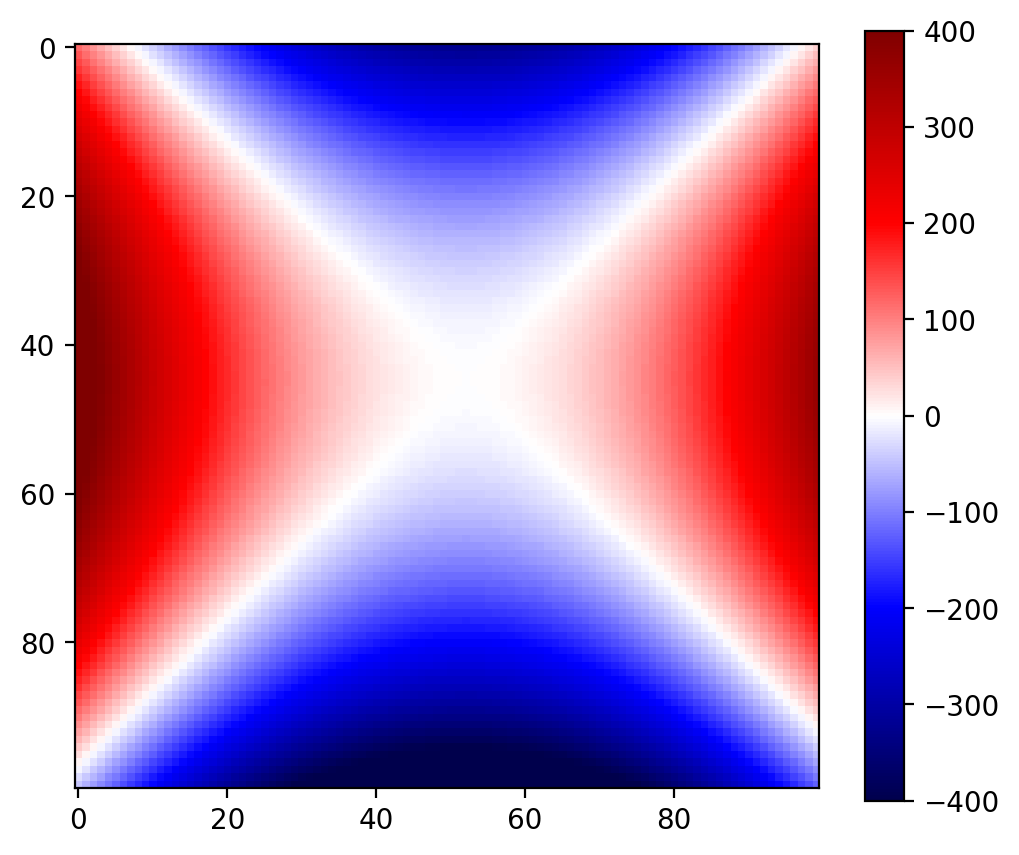

In [46]:
fig, ax = plt.subplots(1, 1, figsize=(6, 5))
obj = ax.imshow(z, cmap=plt.cm.seismic, vmin=-400, vmax=400)
fig.colorbar(obj);

Для того чтобы на графике показать цветовую шкалу, отображающую значения функции, можно воспользоваться функцией `colorbar`, в которую аргументом нужно передать наш объект `obj`, для которого и строится цветовая шкала.

Другой функцией, способной воспроизвести двумерное распределение нашей функции, является `pcolormesh`. В отличие от `imshow`, функция `pcolormesh` способна рисовать 2D изображения для произвольной (необязательно прямоугольной) сетки.

Для разнообразия возмем функцию 
$r = -\sqrt{x^2 + y^2}$

In [47]:
def func2(x, y):
    r = x ** 2 + y ** 2
    return -np.sqrt(r)

In [48]:
I = func2(X, Y)

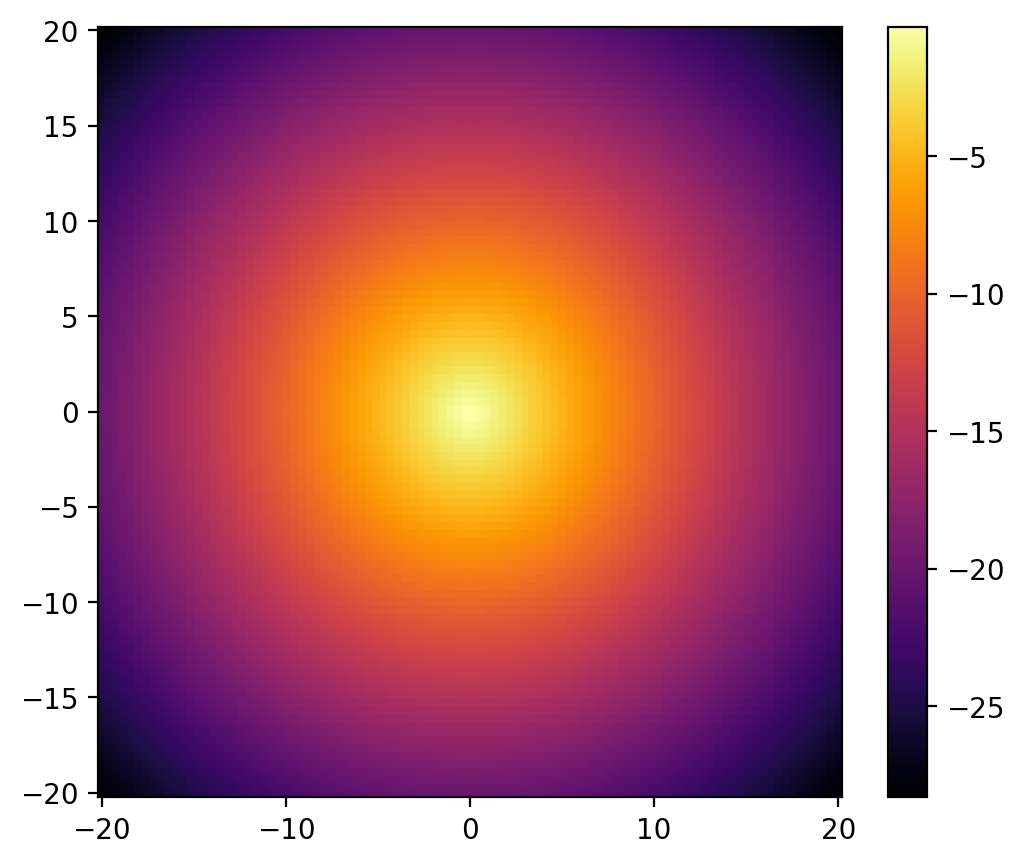

In [50]:
fig, ax = plt.subplots(1, 1, figsize=(6, 5))
mapp = ax.pcolormesh(X, Y, I, cmap='inferno', shading='auto', edgecolor='face')
fig.colorbar(mapp);

### 3D Графики

Иногда возникает необходимость создавать и трехмерные изображения. Чтобы сделать такой рисунок нужно, подобно круговым графикам, определить соотвествующий атрибут при создании области рисования (в данном случае это `subplot_kw`, куда передается тип нашего графика)

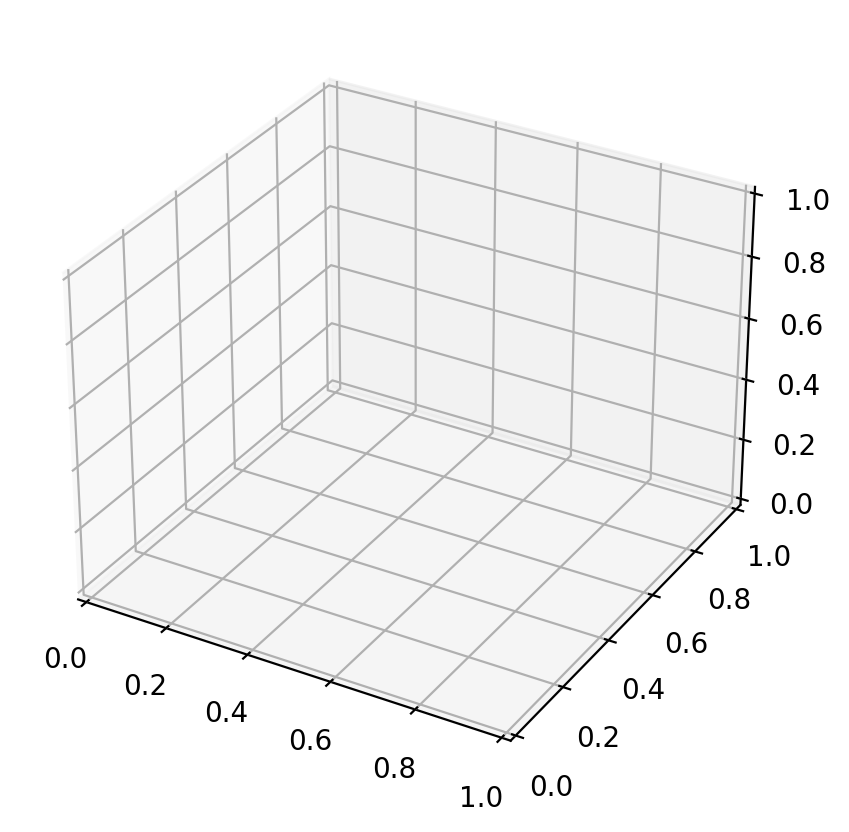

In [52]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5), subplot_kw={'projection': "3d"});

Рассмотрим следующую функцию $f(x, y) = x^4 - y^4$

In [53]:
def func3(x, y):
    return x**4 - y**4

In [54]:
x = np.linspace(-20, 20, 100)
y = np.linspace(-20, 20, 100)

X, Y = np.meshgrid(x, y)

In [55]:
Z = func3(X, Y)

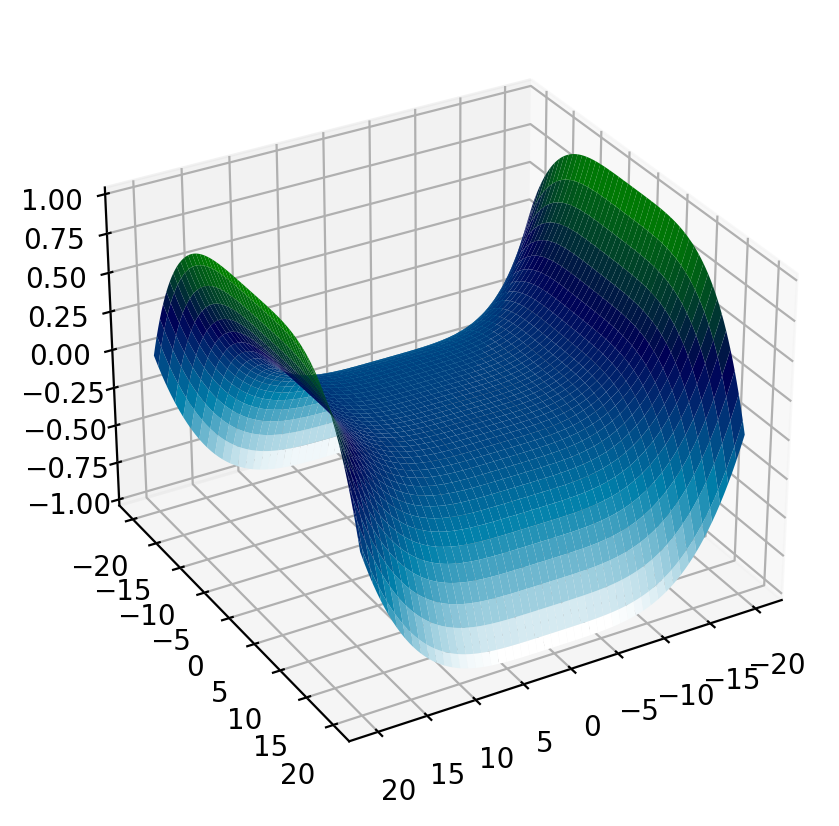

In [57]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5), subplot_kw={'projection': "3d"})
ax.plot_surface(X, Y, Z / Z.max(), cmap=plt.cm.ocean_r)
ax.view_init(30, 60);  # угол просмотра

Все доступные методы для построения 3D графиков можно посмотреть по [ссылке](https://matplotlib.org/2.0.2/mpl_toolkits/mplot3d/tutorial.html)